<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="left" width="30%"><img src="images/IST_logo.png" width="50%"></td>
        <td width="40%"></td>
        <td align="right" width="30%"><img src="images/ds_logo.png" width="25%"></td>
    </tr>
    <tr><td align="left" width="30%"></td>
        <td width="40%"><p align="center"><img src="images/title.png"</td>
        <td align="right" width="30%"></td>
    </tr>
</table>

<h1 align="center" style="font-family:Arial;color:#6c6c6c;font-size:30px;">Lab 3: Classification (cont.)</h1>

<h2 style="font-family:Arial;color:#6c6c6c;font-size:25px;">Decision Trees</h2>

<strong>Decision Trees</strong> are a friendly kind of model for classification, since they are interpretable and easy 
to apply. They are implemented in the <code>DecisionTreeClassifier</code> of <code>sklearn.tree</code> package.

In general, algorithms for training decision trees choose the best variable to split the dataset, in a manner that in 
each branch we will have a smaller mixture of classes. Then the algorithm repeats in the same way for each branch, until
it reaches a <i>pure leaf</i> (a node with all the records of the same class) or there are no more variables to split 
the data.

The choice of the best variable is done according to a <code>criterion</code>: <code>entropy</code> and <code>giny</code>
for implementing the <i>information gain</i> and <i>giny impurity</i> functions, respectively. 

Among the several parameters, the <code>max_depth</code> determines the maximum size of the tree to reach, implementing 
a pre-pruning strategy. Other parameters with similar effects are the <code>min_samples_leaf</code>, 
<code>min_samples_split</code> and <code>min_impurity_decrease</code> thresholds, that avoid continuing growing the 
tree.

<Figure size 432x288 with 0 Axes>

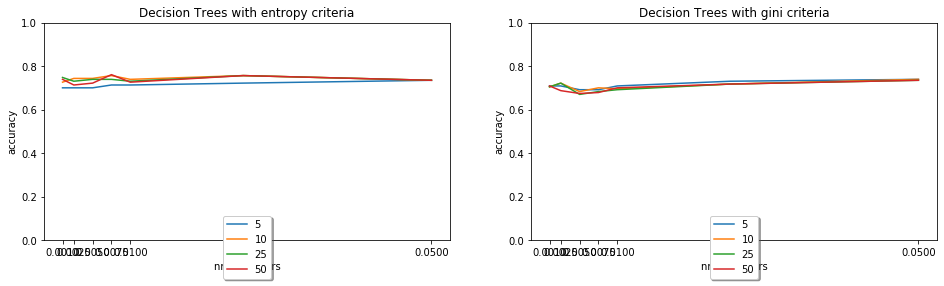

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
%load functions.ipynb
import ipynb.fs.defs.functions as func

data: pd.DataFrame = pd.read_csv('data/diabetes.csv')
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

min_samples_leaf = [.05, .025, .01, .0075, .005, .0025, .001]
max_depths = [5, 10, 25, 50]
criteria = ['entropy', 'gini']

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for n in min_samples_leaf:
            rf = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
        values[d] = yvalues
    func.multiple_line_chart(axs[0, k], min_samples_leaf, values, 'Decision Trees with %s criteria'%f, 'nr estimators', 
                             'accuracy', percentage=True)
    
plt.show()


<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="center" width="30%"><a href="Lab32_knn.ipynb"><img src="images/prev.png"></a></td>
        <td width="40%"></td>
        <td align="center" width="30%"><a href="Lab34_forests.ipynb"><img src="images/next.png"></a></td>
    </tr>
</table>